# T2.2: Scraping. Descarga de titulares de varios medios

Comezaremos por introducir os imports pertinentes

In [68]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import requests
import json
from collections import deque
#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

import urllib3, nltk
from bs4 import BeautifulSoup
nltk.download('stopwords')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

O seguinte código realizará a limpeza de palabras máis comúns as que son longas e as que son moi curtas como para aportar significado

In [69]:
def limparcodigo(texto):
    clean_texto=''
    punctuation=[]
    for s in string.punctuation:
        punctuation.append(str(s))
    sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«",'->','(',')']

    punctuation += sp_punctuation

    punctuation[:10] 
    stop_words = stopwords.words('spanish') 

    stop_words += ["\u200b", "\xa0",'de','y','es','se','en','con',"para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser",'chegar','encuadren','luego','fai','fin','dos','poden','cualquier','tratan','encontrar','chámase','mayor','dos','poden','non','seu','base','poder','luego','cales','destas','mismos','característica','tan','después','llegar','sacar','mediante','é','punto','bien','unha'] #Añadimos algunos caractéres que hemos encontrado
    stop_words += ['también', 'además', 'así', 'ahora', 'aún', 'mientras', 'porque', 'aunque', 'sino', 'entonces', 'luego', 'después', 'antes', 'cuando', 'donde', 'como', 'muy', 'más', 'menos', 'aunque', 'aún', 'aún', 'hasta', 'sobre', 'bajo', 'ante', 'tras', 'entre', 'según', 'casi', 'quizás', 'tal vez', 'siempre', 'nunca', 'jamás']
    stop_words += ['entretanto', 'conjunto', 'conjuntamente', 'por ende', 'por consiguiente', 'posteriormente', 'por lo general', 'a pesar', 'sin embargo', 'no obstante', 'además de', 'asimismo', 'por último', 'por ejemplo', 'de hecho', 'a partir de', 'a su vez', 'por consiguiente', 'al contrario', 'por lo tanto', 'en consecuencia', 'en definitiva', 'en lugar de', 'seguidamente', 'a través de', 'en cuanto a', 'en resumen', 'en otras palabras', 'en términos de', 'a propósito', 'a medida que', 'en cambio', 'por lo que', 'por lo general', 'en particular', 'en su lugar', 'en su totalidad']

    stop_words[:10]

    for sw in stop_words:
        clean_texto = texto.lower().replace(sw,"")
    clean_texto=clean_texto.replace('\n', 'cambiodetitular ')
    for p in punctuation:
        clean_texto = clean_texto.replace(p,"")
 
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)

    clean_texto
    lista_texto = clean_texto.split(" ")

    palabras = []

    #Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

    for palabra in lista_texto:
        if (len(palabra)>3 and len(palabra)<18):
            palabras.append(palabra)
    lista_texto = clean_texto.split(" ")

    palabras = []

    #Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

    for palabra in lista_texto:
        if (len(palabra)>=3 and len(palabra)<18):
            palabras.append(palabra)
    resultado=' '.join(palabras)
    return resultado

In [70]:
from bs4 import BeautifulSoup
import urllib3
import json
import pandas as pd

ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"
headers = {"User-Agent": ua}

with open("periodicos.json", "r") as f:
    json_data = json.load(f)

def get_text(url, tag, clase):
    http = urllib3.PoolManager()
    request = http.request('GET', url, fields=None, headers=headers)
    soup = BeautifulSoup(request.data, 'html.parser')
    titular = " ".join([tag.text for tag in soup.find_all(tag, class_=clase)])
    return (titular) 

resultados = []
texto=''
urls = json_data.get("fontes", {}) 
for source, url_info in urls.items():
    url = url_info.get("url", "")
    tag = url_info.get("tag", "")
    clase = url_info.get("clase", "")
    texto+=get_text(url, tag, clase)+''
    resultados.append([get_text(url, tag, clase),url,0])

    
for result in resultados:
    print("URL:", result[1])
    print("Titulares:", result[0])
    print("----")



URL: http://www.lavozdegalicia.com
Titulares: 
Arranca la campaña de las elecciones gallegas
 
La portavoz de los familiares del Villa de Pitanxo: «Los 21 fallecidos pueden descansar en paz, la verdad ha salido a la luz»
 
Las protestas de los agricultores alimentan el proteccionismo en la Unión Europea
 
Sánchez dice que «todos los independentistas catalanes van a ser amnistiados porque no son terroristas»
 
El Gobierno subastará energía a cambio de proyectos industriales para Galicia
 
Las jubilaciones de médicos de familia se cubrirán con personal que estará obligado a hacer guardias
 
El callejón sin salida del caso Déborah Fernández
 
Rueda hará una campaña para peinar todo el país: «Nada está feito aínda»
 
Ana Pontón apela a los no nacionalistas para intentar liderar el cambio en la Xunta
 
Besteiro agita el voto femenino para que le ayude a liderar el cambio: «Sodes decisivas»
 
Marta Lois se lanza a la pesca del voto progresista: «Se Sumar entra, Rueda sae»
 
Cataluña declara 

In [71]:
resultados

[["\nArranca la campaña de las elecciones gallegas\n \nLa portavoz de los familiares del Villa de Pitanxo: «Los 21 fallecidos pueden descansar en paz, la verdad ha salido a la luz»\n \nLas protestas de los agricultores alimentan el proteccionismo en la Unión Europea\n \nSánchez dice que «todos los independentistas catalanes van a ser amnistiados porque no son terroristas»\n \nEl Gobierno subastará energía a cambio de proyectos industriales para Galicia\n \nLas jubilaciones de médicos de familia se cubrirán con personal que estará obligado a hacer guardias\n \nEl callejón sin salida del caso Déborah Fernández\n \nRueda hará una campaña para peinar todo el país: «Nada está feito aínda»\n \nAna Pontón apela a los no nacionalistas para intentar liderar el cambio en la Xunta\n \nBesteiro agita el voto femenino para que le ayude a liderar el cambio: «Sodes decisivas»\n \nMarta Lois se lanza a la pesca del voto progresista: «Se Sumar entra, Rueda sae»\n \nCataluña declara la emergencia por se

{'arranca': 3, 'campaña': 8, 'elecciones': 12, 'portavoz': 2, 'familiares': 1, 'villa': 2, 'pitanxo': 4, 'fallecidos': 1, 'descansar': 1, 'paz': 3, 'verdad': 2, 'salido': 1, 'protestas': 3, 'agricultores': 8, 'alimentan': 1, 'proteccionismo': 1, 'unión': 1, 'sánchez': 17, 'dice': 4, 'independentistas': 8, 'catalanes': 7, 'van': 6, 'amnistiados': 7, 'gobierno': 10, 'subastará': 1, 'energía': 1, 'cambio': 21, 'proyectos': 4, 'industriales': 1, 'jubilaciones': 1, 'médicos': 1, 'familia': 3, 'cubrirán': 1, 'personal': 2, 'obligado': 1, 'callejón': 1, 'salida': 4, 'caso': 10, 'déborah': 1, 'rueda': 10, 'hará': 5, 'peinar': 1, 'país': 5, 'feito': 1, 'ana': 5, 'pontón': 4, 'apela': 2, 'nacionalistas': 1, 'intentar': 2, 'liderar': 4, 'besteiro': 4, 'agita': 1, 'voto': 3, 'femenino': 2, 'ayude': 1, 'sodes': 1, 'marta': 6, 'lois': 1, 'lanza': 9, 'pesca': 1, 'progresista': 1, 'sumar': 6, 'entra': 2, 'cataluña': 10, 'declara': 7, 'emergencia': 15, 'sequía': 17, 'seis': 8, 'millones': 26, 'supremo'

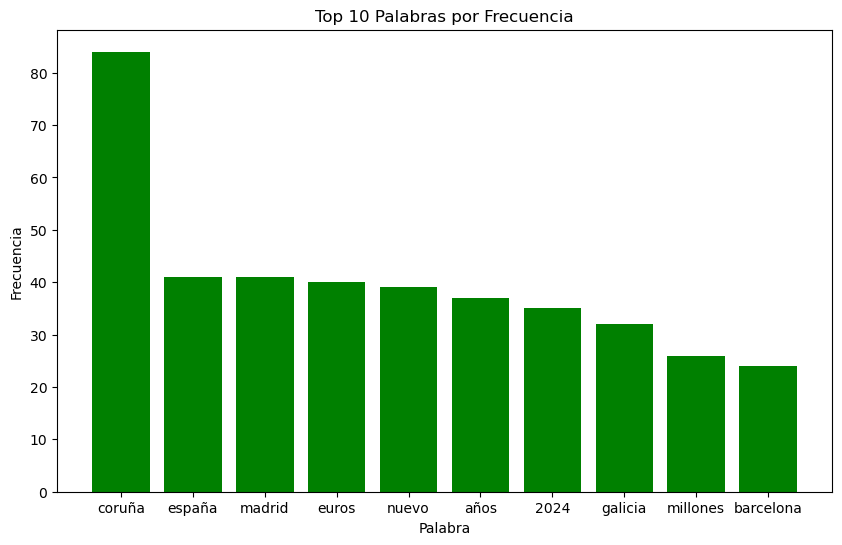

In [72]:
texto_limpo=limparcodigo(texto)
palabras = texto_limpo.lower().split()
frecuencia_palabras = {}
for palabra in palabras:
    if palabra != 'cambiodetitular':
        frecuencia_palabras[palabra] = frecuencia_palabras.get(palabra, 0) + 1
print(frecuencia_palabras)

df = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
df = df.sort_values(by='Frecuencia', ascending=False)
df = df.reset_index(drop=True)
top_10 = df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10['Palabra'], top_10['Frecuencia'],color='green')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras por Frecuencia')
plt.show()

In [73]:
lista_titulares=[]
for resultado in resultados:
    resultado_limpo=limparcodigo(resultado[0])
    if resultado_limpo.split('cambiodetitular')!='':
        lista_titulares.append(resultado_limpo.split('cambiodetitular'))



In [74]:


lista_titulares = [[elem.strip() for elem in sublist if elem.strip() != ''] for sublist in lista_titulares]
for lista in lista_titulares:
    # print(lista)
    for l in lista:
        print(l)


arranca campaña elecciones
portavoz familiares villa pitanxo fallecidos descansar paz verdad salido
protestas agricultores alimentan proteccionismo unión
sánchez dice independentistas catalanes van amnistiados
gobierno subastará energía cambio proyectos industriales
jubilaciones médicos familia cubrirán personal obligado
callejón salida caso déborah
rueda hará campaña peinar país feito
ana pontón apela nacionalistas intentar liderar cambio
besteiro agita voto femenino ayude liderar cambio sodes
marta lois lanza pesca voto progresista sumar entra rueda
cataluña declara emergencia sequía seis millones
supremo rechaza intento josé manuel baltar evitar juicio conducir 215 hora coche
menores participaron crimen samuel luiz coruña libres
sánchez invita ségolène royal probar variedades tomates verá tomate español
pablo valcarce medita oferta baleares irse cedido
secretos parejas duraderas finalidad relación hacernos
yoly saa fútbol firmar contrato discográfico gallega participa benidorm
deten

In [75]:
lista_pesos=[]
sumatorio=0;cont=0
for listas in lista_titulares:
    for l in listas:
        palabras=l.split()
        for pal in palabras:    
            for palabra,peso in frecuencia_palabras.items():
                if palabra==pal:
                    sumatorio+=peso
                    cont+=1
        lista_pesos.append(sumatorio/cont)
        sumatorio=0
        cont=0

In [76]:
pesomax=max(lista_pesos)
lista_pesos = [valor / pesomax for valor in lista_pesos]
lista_pesos

[0.3097643097643098,
 0.07631874298540965,
 0.11313131313131312,
 0.32996632996632996,
 0.2558922558922559,
 0.06060606060606061,
 0.16161616161616163,
 0.20202020202020202,
 0.2251082251082251,
 0.18686868686868688,
 0.17508417508417506,
 0.5589225589225589,
 0.24579124579124578,
 0.5656565656565656,
 0.18585858585858583,
 0.15584415584415584,
 0.08754208754208753,
 0.12121212121212122,
 0.14430014430014432,
 0.08978675645342313,
 0.24819624819624822,
 0.3771043771043771,
 0.3313131313131313,
 0.12121212121212122,
 0.1414141414141414,
 0.4323232323232323,
 0.18855218855218855,
 0.28686868686868683,
 0.06060606060606061,
 0.07407407407407407,
 0.09595959595959595,
 0.39730639730639733,
 0.19834710743801653,
 0.04040404040404041,
 0.17508417508417506,
 0.2727272727272727,
 0.10101010101010101,
 0.21010101010101012,
 0.06060606060606061,
 0.38608305274971944,
 0.04713804713804714,
 0.3867243867243867,
 0.16161616161616163,
 0.09696969696969697,
 0.08080808080808081,
 0.3367003367003367,


In [77]:
cont=0
for relativos in resultados:
    relativos[2]=relativos[2]+lista_pesos[cont]+1
    cont+=1
resultados

[["\nArranca la campaña de las elecciones gallegas\n \nLa portavoz de los familiares del Villa de Pitanxo: «Los 21 fallecidos pueden descansar en paz, la verdad ha salido a la luz»\n \nLas protestas de los agricultores alimentan el proteccionismo en la Unión Europea\n \nSánchez dice que «todos los independentistas catalanes van a ser amnistiados porque no son terroristas»\n \nEl Gobierno subastará energía a cambio de proyectos industriales para Galicia\n \nLas jubilaciones de médicos de familia se cubrirán con personal que estará obligado a hacer guardias\n \nEl callejón sin salida del caso Déborah Fernández\n \nRueda hará una campaña para peinar todo el país: «Nada está feito aínda»\n \nAna Pontón apela a los no nacionalistas para intentar liderar el cambio en la Xunta\n \nBesteiro agita el voto femenino para que le ayude a liderar el cambio: «Sodes decisivas»\n \nMarta Lois se lanza a la pesca del voto progresista: «Se Sumar entra, Rueda sae»\n \nCataluña declara la emergencia por se

In [78]:
import time
from airium import Airium

a = Airium()
cont=0

# Librería para el manejo de HTML
a('<!DOCTYPE html>')
with a.html(lang="pl"):
    with a.head():
        a.meta(charset="utf-8")
        a.title(_t="Página de noticias")
    with a.body():
        for result in resultados:
            for lista in lista_titulares:
                for l in lista:
                    with a.p(style=f"font-size:{lista_pesos[cont]+1}em;"):
                        with a.a(href=result[1]):
                            a(l)
                    cont+=1
            cont=0

html = str(a)  # Casteo de los datos

# Escribimos el HTML con el año, mes y día
with open(f"resultado-{time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday}.html","w+") as f:
    f.write(html)

In [79]:
import sqlite3
connection=0
if not(connection):
    connection=sqlite3.connect("titular.db")
cursor = connection.cursor()
try:
    cursor.execute("CREATE TABLE titulares (texto TEXT, url TEXT, pes_rel REAL)")
except:
    print("Tabla ya creada")

Tabla ya creada


In [80]:
lista_final=[]
for i in range(len(lista_titulares)):
    #indice para el url y el peso
    for lista in lista_titulares:
        for l in lista:
            lista_art=[l,lista_pesos[i],resultados[i][1]]
            lista_final.append(lista_art)

lista_final

[['arranca campaña elecciones',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['portavoz familiares villa pitanxo fallecidos descansar paz verdad salido',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['protestas agricultores alimentan proteccionismo unión',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['sánchez dice independentistas catalanes van amnistiados',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['gobierno subastará energía cambio proyectos industriales',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['jubilaciones médicos familia cubrirán personal obligado',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['callejón salida caso déborah',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['rueda hará campaña peinar país feito',
  0.3097643097643098,
  'http://www.lavozdegalicia.com'],
 ['ana pontón apela nacionalistas intentar liderar cambio',
  0.3097643097643098,
  'http://www.lavozdegali

In [81]:
cursor.executemany("""
    INSERT INTO titulares ('texto', 'url', 'pes_rel')
    VALUES (?,?,?)""", lista_final)
cursor.execute("SELECT * FROM titulares order by pes_rel desc")
rows = cursor.fetchall()
connection.close()